# Coronary Artery Disease - Mini Project 4

## Exercise 1, 2 ,3

In [953]:
#Exercise 1
#I picked coronary artery disease (leading to heart failure)

#Exercise 2
# I picked data provided by the UC Irvine machine learning lab on heart failure
# https://archive.ics.uci.edu/ml/datasets/heart+disease
# classification model

# Exercise 3
# Classify using random forest between heart attack and no heart attack

In [954]:
import pandas as pd
import numpy as np
import sklearn as sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plot
from ipywidgets import widgets

## Exercise 4

In [955]:
# import data with headers.
headers = ['age',
'gender',
'chest_pain',
'blood_pressure',
'cholesterol',
'blood_sugar',
'electrocardiogram',
'max_rate',
'angina',
'oldpeak',
'slope',
'ca',
'thal',
'heart_attack']
#downloaded all pieces of processed data by location from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
#CSV was created by combining:
# processed.cleveland.data
# processed.hungarian.data
# processed.switzerland.data
# processed.va.data
# all '?' found were replaced with -1 so that the typing to occur next wouldn't fail
data = pd.read_csv('processed_data_all.csv',names=headers)


# Identify categorical and numerical features
#numerical values
# 'age',
# 'blood_pressure',
# 'cholesterol',
# 'blood_sugar',
# 'max_rate',
# 'oldpeak'

#categorical values
# 'slope',
# 'ca',
# 'thal',
# 'angina',
# 'heart_attack'
# 'electrocardiogram',
# 'gender',
# 'chest_pain'

<AxesSubplot:ylabel='Density'>

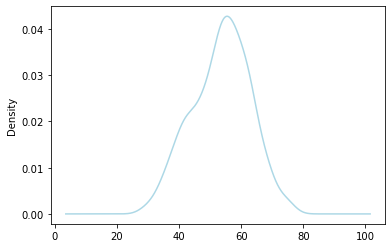

In [956]:
# Provide complete a descriptive analysis on your data
# examine numerical data first
data['age'].plot.kde(color = 'lightblue')
# The density peak for age is aroung 57 years old in all the samples.
# looks like a normal distribution

<AxesSubplot:ylabel='Density'>

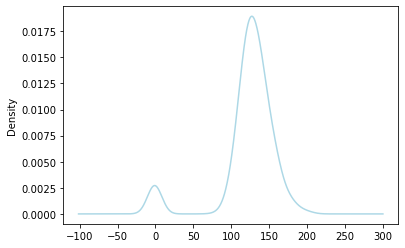

In [957]:
data['blood_pressure'].plot.kde(color = 'lightblue')
# The density peak for blood pressure is around 135 in all the samples.
# the peak around zero is missing data at -1

<AxesSubplot:ylabel='Density'>

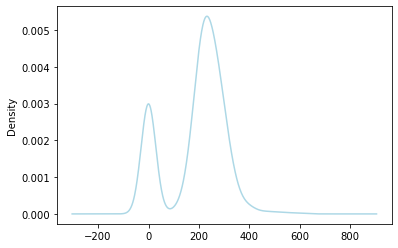

In [958]:
data['cholesterol'].plot.kde(color = 'lightblue')
# The density peak for cholesterol is around 220 in all the samples.
# the peak around zero is missing data at -1

<AxesSubplot:ylabel='Density'>

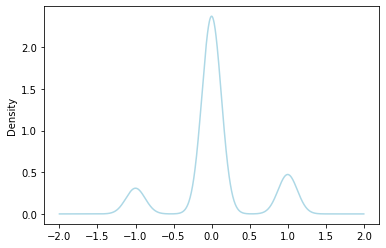

In [959]:
data['blood_sugar'].plot.kde(color = 'lightblue')
# The density peak for fasting blood sugar is around 0.0 in all the samples.
# the peak around zero is missing data at -1

<AxesSubplot:ylabel='Density'>

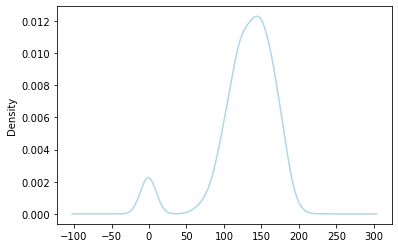

In [960]:
data['max_rate'].plot.kde(color = 'lightblue')
# The density peak for max heart rate is around 145 in all the samples.
# the peak around zero is missing data at -1

<AxesSubplot:ylabel='Density'>

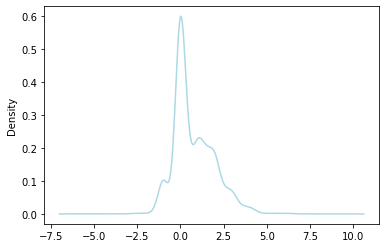

In [961]:
data['oldpeak'].plot.kde(color = 'lightblue')
# The density peak for  ST depression induced by exercise relative to rest, is around 0.5 in all the samples.

<AxesSubplot:ylabel='Density'>

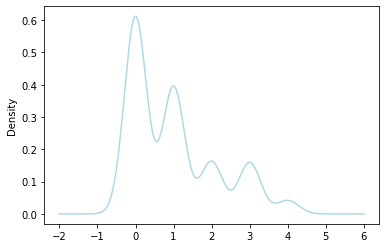

In [962]:
data['heart_attack'].plot.kde(color = 'lightblue')
# The density peak for  heart attack is highest at 0 heart attacks suffered, with 1 being second highest, and 2 and 3 being tied, with 4 heart attacks the lowest peak. 
# this makes sense for very  few survive the first 3 heart attacks to have a 4th without either a change in lifestyle or death.

In [963]:
# Cleaning the Data by making everything the correct type(some of the data was 1.0 vs 1 for the same column. enforcing types here to clean it)
# make all into int types
data['age'] = data['age'].astype(int)
data['gender'] = data['gender'].astype(int)
data['chest_pain'] = data['chest_pain'].astype(int)
data['blood_pressure'] = data['blood_pressure'].astype(int)
data['cholesterol'] = data['cholesterol'].astype(int)
data['blood_sugar'] = data['blood_sugar'].astype(int)
data['electrocardiogram'] = data['electrocardiogram'].astype(int)
data['max_rate'] = data['max_rate'].astype(int)
data['angina'] = data['angina'].astype(int)
# data['oldpeak'] = data['oldpeak'].astype(int) #originally was going to make this int, but realized it was a float afterwards..
data['slope'] = data['slope'].astype(int)
data['ca'] = data['ca'].astype(int)
data['thal'] = data['thal'].astype(int)
data['heart_attack'] = data['heart_attack'].astype(int)

In [964]:
# One-Hot Encoding from towards data science:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# we need to take the numerical values that actually categorical options like 
# (1 = x treatment, 2 = y treatment etc) and pull them out into boolean columns
# this will prevent the algorithm form accidentally treating them like 1 is less important than 2...

#NOTE - MISSING DATA
#Missing data was made it's own category in all cases with Non Applicable (NA) used with the naming scheme)
#This way data could be used if available but allowing for missing data from some samples.
#1759 missing pieces of data for 920 total rows of data.

#gender is a category
data['gender'].replace({0:'gender_F',1:'gender_M'},inplace = True)

# chest_pain is a category
# -- Value 1: typical angina
# -- Value 2: atypical angina
# -- Value 3: non-anginal pain
# -- Value 4: asymptomatic 
data['chest_pain'].replace({-1:'angina_NA',1:'typical_angina',2:'atypical_angina',3:'non-anginal_pain',4:'asymptomatic_angina'},inplace = True)

# 19 electrocardiogram: resting electrocardiographic results is a category
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
data['electrocardiogram'].replace({-1:'ecg_NA',0:'ecg_normal',1:'ecg_abnormality',2:'ecg_hypertrophy'},inplace = True)

# 41 slope: the slope of the peak exercise ST segment is a category
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping 
data['slope'].replace({-1:'slope_NA',1:'slope_upsloping',2:'slope_flat',3:'slope_downsloping'},inplace = True)

# 44 ca: number of major vessels (0-3) colored by flourosopy is a category
data['ca'].replace({-1:'major_arteries_NA',0:'major_arteries_0',1:'major_arteries_1',2:'major_arteries_2',3:'major_arteries_3'},inplace = True)

# 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect is a category
data['thal'].replace({-1:'thal_NA',3:'thal_normal',6:'thal_fixed_defect',7:'thal_reversable_defect'},inplace = True)

# change heart_attack to disease (1) and no disease (0) to work as a classifier and a category instead of a numerical represnetation
data['heart_attack'].replace({1:0,2:1,3:1,4:1,5:1,6:1,7:1},inplace = True)

#create the new boolean columns using the categories outlined above
column1 = pd.get_dummies(data.gender)
column2 = pd.get_dummies(data.chest_pain)
column3 = pd.get_dummies(data.electrocardiogram)
column4 = pd.get_dummies(data.slope)
column5 = pd.get_dummies(data.ca)
column6 = pd.get_dummies(data.thal)
#combine those boolean categories, and replace the originals.
concatinate_columns = pd.concat([column1,column2,column3,column4,column5,column6,data], axis = 'columns')
data = concatinate_columns.drop(['gender','chest_pain','electrocardiogram','slope','ca','thal'],axis = 1)
#look at the data to make sure it looks good.
data.head() 

,gender_F,gender_M,asymptomatic_angina,atypical_angina,non-anginal_pain,typical_angina,ecg_NA,ecg_abnormality,ecg_hypertrophy,ecg_normal,...,thal_normal,thal_reversable_defect,age,blood_pressure,cholesterol,blood_sugar,max_rate,angina,oldpeak,heart_attack
0,0,1,1,0,0,0,0,1,0,0,...,0,0,63,140,260,0,112,1,3.0,1
1,0,1,1,0,0,0,0,1,0,0,...,0,0,44,130,209,0,127,0,0.0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,60,132,218,0,140,1,1.5,1
3,0,1,1,0,0,0,0,1,0,0,...,0,0,55,142,228,0,149,1,2.5,0
4,0,1,0,0,1,0,0,0,1,0,...,0,0,66,110,213,1,99,1,1.3,0


In [965]:
# number of heart attacks by men and women (count)
#women had less heart attacks
data.groupby(['gender_F','gender_M'])['heart_attack'].count().reset_index().head(2)

,gender_F,gender_M,heart_attack
0,0,1,726
1,1,0,194


In [966]:
# number of heart attacks by chest pain (angina) (count)
#asymptomatic_angina had the most heart attacks
data.groupby(['typical_angina','atypical_angina','non-anginal_pain','asymptomatic_angina'])['heart_attack'].count().reset_index().head(4)

,typical_angina,atypical_angina,non-anginal_pain,asymptomatic_angina,heart_attack
0,0,0,0,1,496
1,0,0,1,0,204
2,0,1,0,0,174
3,1,0,0,0,46


In [967]:
# number of heart attacks by ecg (count)
#ecg_normal had the most heart attacks
data.groupby(['ecg_NA','ecg_normal','ecg_abnormality','ecg_hypertrophy'])['heart_attack'].count().reset_index().head(4)

,ecg_NA,ecg_normal,ecg_abnormality,ecg_hypertrophy,heart_attack
0,0,0,0,1,188
1,0,0,1,0,179
2,0,1,0,0,551
3,1,0,0,0,2


In [968]:
# number of heart attacks by slope (count)
#slope_flat had the most heart attacks
data.groupby(['slope_NA','slope_upsloping','slope_flat','slope_downsloping'])['heart_attack'].count().reset_index().head(4)

,slope_NA,slope_upsloping,slope_flat,slope_downsloping,heart_attack
0,0,0,0,1,63
1,0,0,1,0,345
2,0,1,0,0,203
3,1,0,0,0,309


In [969]:
# number of heart attacks by major arteries florecense (count)
# 0 major arteries blocked had the most heart attacks
data.groupby(['major_arteries_NA','major_arteries_0','major_arteries_1','major_arteries_2','major_arteries_3'])['heart_attack'].count().reset_index().head(5)

,major_arteries_NA,major_arteries_0,major_arteries_1,major_arteries_2,major_arteries_3,heart_attack
0,0,0,0,0,1,20
1,0,0,0,1,0,41
2,0,0,1,0,0,67
3,0,1,0,0,0,181
4,1,0,0,0,0,611


In [970]:
# number of heart attacks by thal (count)
# thal normal and reversable defect had the most heart attacks
data.groupby(['thal_NA','thal_normal','thal_fixed_defect','thal_reversable_defect'])['heart_attack'].count().reset_index().head(5)

,thal_NA,thal_normal,thal_fixed_defect,thal_reversable_defect,heart_attack
0,0,0,0,1,192
1,0,0,1,0,46
2,0,1,0,0,196
3,1,0,0,0,486


In [971]:
# Identify Input and Target features
## create features and the classification (had a heart attack yes(1) or no(0))
features = data[['age',
'gender_F',
'gender_M',
'typical_angina',
'atypical_angina',
'non-anginal_pain',
'asymptomatic_angina',
'blood_pressure',
'cholesterol',
'blood_sugar',
'ecg_normal',
'ecg_abnormality',
'ecg_hypertrophy',
'max_rate',
'angina',
'oldpeak',
'slope_upsloping',
'slope_flat',
'slope_downsloping',
'major_arteries_0','major_arteries_1','major_arteries_2','major_arteries_3',
'thal_normal',
'thal_fixed_defect',
'thal_reversable_defect']]

classification = data['heart_attack']

In [972]:
# split the data into training and test sets
# split 10% train 90% test: 72.4%
# split 20% train 80% test: 72.3%
# split 30% train 70% test: 78.1%
# split 40% train 60% test: 80.1%
# split 50% train 50% test: 80.5%
# split 60% train 40% test: 77.3%
# split 70% train 30% test: 78.1%
# split 80% train 20% test: 76.9%
# split 90% train 10% test: 76.8&
train_features, test_features, train_classify, test_classify = train_test_split(features, classification, test_size=0.5)

### Manually tested with the random forest algorithm below to see what split of training versus testing data would provide the best results. 50/50 appeared to be the best.

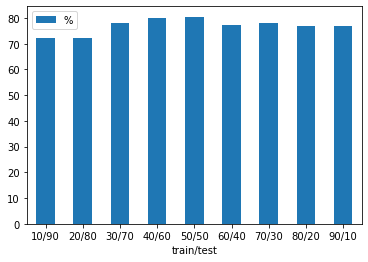

In [973]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# used the example here...
#best choice seems to be to train the model on 50 percent of the data.
df = pd.DataFrame({'train/test':['10/90', '20/80', '30/70', '40/60', '50/50', '60/40', '70/30', '80/20', '90/10'], 
                   '%':[72.4, 72.3, 78.1,80.1,80.5,77.3,78.1,76.9,76.8]})

ax = df.plot.bar(x='train/test', y='%', rot=0)

### Manually tested using GridSearchCV to see what inputs would create the best random forest implementation/algoritm. it appears that the following is the best: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 400, 'random_state': 12} 

0.7804347826086957


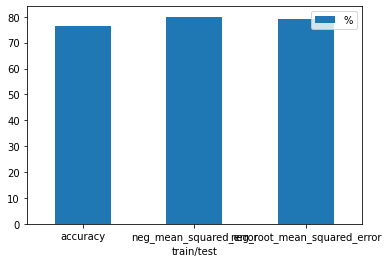

In [974]:
# How to properly tune the model... 
#I gave GridSearchCV some variables to pick from and it selected the best based on the scoring mechanism
# https://scikit-learn.org/stable/modules/model_evaluation.html

# criterion = ['entropy','gini']
# n_estimators = [50,200,400,600,800,1000]
# random_state = [3,6,9,12,15]
# max_features = ['auto','log2']

# tune_classifier = GridSearchCV(RandomForestClassifier(), {'criterion':criterion, 'n_estimators':n_estimators, 'random_state':random_state, 'max_features':max_features},cv = 5, 
#  scoring = 'neg_root_mean_squared_error')
# tune_classifier.fit(train_features, train_classify)
# tune_classifier.best_params_

# scoring = 'accuracy'
# best_params_ == {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50, 'random_state': 9}
# 76.6%

# scoring = 'neg_mean_squared_error'
# best_params_ == {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 400, 'random_state': 12}
# 80.0%

# scoring = 'neg_root_mean_squared_error'
# best_params_ == {'criterion': 'gini', 'max_features': 'auto',  'n_estimators': 50,  'random_state': 6}
# 79.3%

df = pd.DataFrame({'train/test':['accuracy', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], 
                   '%':[76.6,80.0,79.3]})

ax = df.plot.bar(x='train/test', y='%', rot=0)


random_forest_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 400, random_state = 12, max_features = 'log2')
random_forest_model.fit(train_features, train_classify)

print(random_forest_model.score(test_features, test_classify))

### looked to see which features were most important, thus allowing for the pruning of all the low importance features. This will be important when constructing the proof of concept as adding 32 different pieces of information is daunting. 

In [975]:
#https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd
#this code is for finding the most important features. provided by towards data science.
# age                      0.13
# cholesterol              0.11
# max_rate                 0.11
# oldpeak                  0.11
# blood_pressure           0.08
# asymptomatic_angina      0.05
# atypical_angina          0.04
# blood_sugar              0.04
list_of_features = list(random_forest_model.feature_importances_)
list_of_importance = [(f, round(i, 2)) for f, i in zip(features, list_of_features)]
list_of_importance = sorted(list_of_importance, key = lambda x: x[1], reverse = True)
[print('{:25}{}'.format(*x)) for x in list_of_importance]

age                      0.16
max_rate                 0.12
oldpeak                  0.12
cholesterol              0.1
blood_pressure           0.08
asymptomatic_angina      0.04
blood_sugar              0.03
ecg_normal               0.03
angina                   0.03
thal_reversable_defect   0.03
atypical_angina          0.02
ecg_abnormality          0.02
ecg_hypertrophy          0.02
slope_upsloping          0.02
slope_flat               0.02
major_arteries_0         0.02
major_arteries_2         0.02
thal_normal              0.02
thal_fixed_defect        0.02
gender_F                 0.01
gender_M                 0.01
typical_angina           0.01
non-anginal_pain         0.01
slope_downsloping        0.01
major_arteries_1         0.01
major_arteries_3         0.01


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Identified 7 features needed to make accurate predections of approximately 80%.

In [976]:
# Identify Input and Target features again to create a more concise feature list based on importance
# age                      0.13
# cholesterol              0.11
# max_rate                 0.11
# oldpeak                  0.11
# blood_pressure           0.08
# asymptomatic_angina      0.05
# atypical_angina          0.04
# blood_sugar              0.04

features = data[['age',
                 'cholesterol',
                 'max_rate',
                 'oldpeak',
                 'blood_pressure',
                 'asymptomatic_angina',
                 'atypical_angina',
                 'blood_sugar',
]]

classification = data['heart_attack']

train_features, test_features, train_classify, test_classify = train_test_split(features, classification, test_size=0.5)
random_forest_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 400, random_state = 12, max_features = 'log2')
random_forest_model.fit(train_features, train_classify)

print(random_forest_model.score(test_features, test_classify))
#82% successful prediciton rate


0.7652173913043478


## EXERCISE 5 - PROOF OF CONCEPT

In [977]:
#exercise 5 - build a proof of concept
# built widget based checker with 80% accuracy if patient will have a heart attack based on patient stats
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html
age = widgets.Text( placeholder='age (int) ex 76')
cholesterol = widgets.Text( placeholder='cholesterol (int) ex 256')
max_rate = widgets.Text( placeholder='max_rate (int) ex 150')
oldpeak = widgets.Text( placeholder='oldpeak (float) ex 2.0')
blood_pressure = widgets.Text( placeholder='blood_pressure (int) ex 140')
asymptomatic_angina = widgets.Dropdown(
       options=['0', '1'],
       value='0',
       description='asymptomatic_angina: ')
atypical_angina = widgets.Dropdown(
       options=['0', '1'],
       value='0',
       description='atypical_angina: ')
blood_sugar = widgets.Text( placeholder='blood_sugar (int) ex 2')
display(age)
display(cholesterol)
display(max_rate)
display(oldpeak)
display(blood_pressure)
display(asymptomatic_angina)
display(atypical_angina)
display(blood_sugar)
# this code was taken directly from the example here and modified
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html
button = widgets.Button(description='future heart attack?')
display(button)

from IPython.display import display
output = widgets.Output()
display(output)
def on_button_clicked(b):
    with output:
        
        print("80% Chance of heart attack: ", 1 == random_forest_model.predict([[age.value,cholesterol.value,max_rate.value,oldpeak.value,blood_pressure.value,asymptomatic_angina.value,atypical_angina.value,blood_sugar.value]]))

button.on_click(on_button_clicked)

Text(value='', placeholder='age (int) ex 76')

Text(value='', placeholder='cholesterol (int) ex 256')

Text(value='', placeholder='max_rate (int) ex 150')

Text(value='', placeholder='oldpeak (float) ex 2.0')

Text(value='', placeholder='blood_pressure (int) ex 140')

Dropdown(description='asymptomatic_angina: ', options=('0', '1'), value='0')

Dropdown(description='atypical_angina: ', options=('0', '1'), value='0')

Text(value='', placeholder='blood_sugar (int) ex 2')

Button(description='future heart attack?', style=ButtonStyle())

Output()